# Contents:
1. SVR-RFR1: Using everything - 70 features
2. SVR-RFR2: Without spectral features - 68 features
3. SVR-RER3: Using both spectral and tempo features with feature selection
4. Evaluation of svr perfoemance wrt the datasets.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR

svr = SVR()

In [2]:
df = pd.read_csv('data-v4.csv', index_col=0)

In [3]:
df.head(3)

,ZCR,Energy,Entropy of Energy,Spectral Centroid,Spectral Spread,Spectral Entropy,Spectral Flux,Spectral Rolloff,MFCC.1,MFCC.2,...,CV.7_SD,CV.8_SD,CV.9_SD,CV.10_SD,CV.11_SD,Chroma Deviation_SD,Tempo Feature1,Tempo Feature2,Valence,Arousal
Song ID,,,,,,,,,,,,,,,,,,,,,
0,0.234463,0.074886,0.792056,0.153942,0.077575,0.305852,0.140355,0.343998,0.591378,0.579080,...,0.189526,0.193013,0.273233,0.419740,0.482732,0.170282,0.142857,0.320790,-0.4,0.5
1,0.192285,0.096489,0.814660,0.136038,0.088316,0.241364,0.107631,0.282864,0.561162,0.630659,...,0.085899,0.163944,0.437033,0.428849,0.427423,0.146012,0.142857,0.271091,0.5,-0.5
2,0.529244,0.184599,0.562987,0.414212,0.137845,0.759576,0.184610,0.761827,0.481685,0.165364,...,0.251068,0.029417,0.195861,0.598474,0.164410,0.329922,0.142857,0.250898,-0.2,0.4


# SVR1

In [4]:
data_tr1 = df.iloc[:264, 0:70]
data_ts1 = df.iloc[264:, 0:70]
valence_tr1 = df.iloc[:264, 70]
arousal_tr1 = df.iloc[:264, 71]
valence_ts1 = df.iloc[264:, 70]
arousal_ts1 = df.iloc[264:, 71]

In [5]:
data_tr1.head(3)

,ZCR,Energy,Entropy of Energy,Spectral Centroid,Spectral Spread,Spectral Entropy,Spectral Flux,Spectral Rolloff,MFCC.1,MFCC.2,...,CV.5_SD,CV.6_SD,CV.7_SD,CV.8_SD,CV.9_SD,CV.10_SD,CV.11_SD,Chroma Deviation_SD,Tempo Feature1,Tempo Feature2
Song ID,,,,,,,,,,,,,,,,,,,,,
0,0.234463,0.074886,0.792056,0.153942,0.077575,0.305852,0.140355,0.343998,0.591378,0.579080,...,0.216228,0.215754,0.189526,0.193013,0.273233,0.419740,0.482732,0.170282,0.142857,0.320790
1,0.192285,0.096489,0.814660,0.136038,0.088316,0.241364,0.107631,0.282864,0.561162,0.630659,...,0.099773,0.121449,0.085899,0.163944,0.437033,0.428849,0.427423,0.146012,0.142857,0.271091
2,0.529244,0.184599,0.562987,0.414212,0.137845,0.759576,0.184610,0.761827,0.481685,0.165364,...,0.515858,0.158287,0.251068,0.029417,0.195861,0.598474,0.164410,0.329922,0.142857,0.250898


In [6]:
valence_tr1.head(4)

Song ID
0   -0.4
1    0.5
2   -0.2
3    0.1
Name: Valence, dtype: float64

In [7]:
train1 = data_tr1.values
test1 = data_ts1.values

In [8]:
C = [0.01, 0.1, 1.0, 10.0]
gamma = [0.01, 0.1, 1.0]
kernel = ('linear', 'rbf')
params = {'C' : C, 'gamma' : gamma, 'kernel' : kernel}
grid_searc_svr1_valence = GridSearchCV(svr, params, cv = 10, scoring = 'neg_mean_squared_error')
grid_searc_svr1_valence.fit(train1, valence_tr1)

/home/broda/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.1, 1.0, 10.0], 'gamma': [0.01, 0.1, 1.0], 'kernel': ('linear', 'rbf')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [9]:
results1_valence = grid_searc_svr1_valence.cv_results_
valence_pred_tr1 = grid_searc_svr1_valence.predict(train1)
valence_pred_ts1 = grid_searc_svr1_valence.predict(test1)
print(grid_searc_svr1_valence.best_params_)

{'C': 1.0, 'gamma': 1.0, 'kernel': 'rbf'}


In [10]:
grid_searc_svr1_arousal = GridSearchCV(svr, params, cv = 10, scoring = 'neg_mean_squared_error')
grid_searc_svr1_arousal.fit(train1, arousal_tr1)
results_ar1 = grid_searc_svr1_arousal.cv_results_
arousal_pred_tr1 = grid_searc_svr1_arousal.predict(train1)
arousal_pred_ts1 = grid_searc_svr1_arousal.predict(test1)

/home/broda/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# SVR 2

In [11]:
data_tr2 = df.iloc[:264, 0:68]
data_ts2 = df.iloc[264:, 0:68]

valence_tr2 = df.iloc[:264, 70]
arousal_tr2 = df.iloc[:264, 71]
arousal_ts2 = df.iloc[264:, 71]
valence_ts2 = df.iloc[264:, 70]

In [12]:
data_tr2.head()

,ZCR,Energy,Entropy of Energy,Spectral Centroid,Spectral Spread,Spectral Entropy,Spectral Flux,Spectral Rolloff,MFCC.1,MFCC.2,...,CV.3_SD,CV.4_SD,CV.5_SD,CV.6_SD,CV.7_SD,CV.8_SD,CV.9_SD,CV.10_SD,CV.11_SD,Chroma Deviation_SD
Song ID,,,,,,,,,,,,,,,,,,,,,
0,0.234463,0.074886,0.792056,0.153942,0.077575,0.305852,0.140355,0.343998,0.591378,0.579080,...,0.428120,0.412970,0.216228,0.215754,0.189526,0.193013,0.273233,0.419740,0.482732,0.170282
1,0.192285,0.096489,0.814660,0.136038,0.088316,0.241364,0.107631,0.282864,0.561162,0.630659,...,0.241003,0.379427,0.099773,0.121449,0.085899,0.163944,0.437033,0.428849,0.427423,0.146012
2,0.529244,0.184599,0.562987,0.414212,0.137845,0.759576,0.184610,0.761827,0.481685,0.165364,...,0.172444,0.282025,0.515858,0.158287,0.251068,0.029417,0.195861,0.598474,0.164410,0.329922
3,0.174056,0.327551,0.702462,0.117873,0.092945,0.268255,0.119694,0.254264,0.779803,0.694776,...,0.253440,0.438035,0.127390,0.306455,0.113021,0.151309,0.380682,0.513874,0.354728,0.153605
4,0.152077,0.331886,0.816246,0.207490,0.201975,0.080789,0.097912,0.156764,0.650227,0.759873,...,0.186622,0.112676,0.241074,0.589297,0.194927,0.430999,0.114536,0.192101,0.240289,0.253724


In [13]:
train2 = data_tr2.values
test2 = data_ts2.values
grid_searc_svr2_valence = GridSearchCV(svr, params, cv = 10, scoring = 'neg_mean_squared_error')
grid_searc_svr2_valence.fit(train2, valence_tr2)

/home/broda/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.1, 1.0, 10.0], 'gamma': [0.01, 0.1, 1.0], 'kernel': ('linear', 'rbf')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [14]:
results2 = grid_searc_svr2_valence.cv_results_
valence_pred_tr2 = grid_searc_svr2_valence.predict(train2)
valence_pred_ts2 = grid_searc_svr2_valence.predict(test2)

In [15]:
grid_searc_svr2_arousal = GridSearchCV(svr, params, cv = 10, scoring = 'neg_mean_squared_error')
grid_searc_svr2_arousal.fit(train2, arousal_tr2)

/home/broda/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.1, 1.0, 10.0], 'gamma': [0.01, 0.1, 1.0], 'kernel': ('linear', 'rbf')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [16]:
results_ar2 = grid_searc_svr2_arousal.cv_results_
arousal_pred_tr2 = grid_searc_svr2_arousal.predict(train2)
arousal_pred_ts2 = grid_searc_svr2_arousal.predict(test2)

# SVR3

In [17]:
data3 = df.loc[:, ['Tempo Feature1',
 'Spectral Centroid',
 'ZCR',
 'Spectral Entropy',
 'CV.7',
 'Spectral Flux',
 'Spectral Rolloff',
 'MFCC.4',
 'MFCC.2',
 'CV.5',
 'Entropy of Energy',
 'MFCC.3',
 'CV.8',
 'Tempo Feature2',
 'MFCC.13',
 'Spectral Centroid_SD',
 'ZCR_SD',
 'Spectral Entropy_SD',
 'CV.7_SD',
 'Spectral Flux_SD',
 'Spectral Rolloff_SD',
 'MFCC.4_SD',
 'MFCC.2_SD',
 'CV.5_SD',
 'Entropy of Energy_SD',
 'MFCC.3_SD',
 'CV.8_SD',
 'MFCC.13_SD']]
data_tr3 = data3.iloc[:264, :]
data_ts3 = data3.iloc[264:, :]

valence_tr3 = df.iloc[:264, 70]
arousal_tr3 = df.iloc[:264, 71]
arousal_ts3 = df.iloc[264:, 71]
valence_ts3 = df.iloc[264:, 70]

In [18]:
data_tr3.head(4)

,Tempo Feature1,Spectral Centroid,ZCR,Spectral Entropy,CV.7,Spectral Flux,Spectral Rolloff,MFCC.4,MFCC.2,CV.5,...,CV.7_SD,Spectral Flux_SD,Spectral Rolloff_SD,MFCC.4_SD,MFCC.2_SD,CV.5_SD,Entropy of Energy_SD,MFCC.3_SD,CV.8_SD,MFCC.13_SD
Song ID,,,,,,,,,,,,,,,,,,,,,
0,0.142857,0.153942,0.234463,0.305852,0.255244,0.140355,0.343998,0.539501,0.579080,0.214472,...,0.189526,0.056174,0.255495,0.344792,0.421319,0.216228,0.127116,0.312993,0.193013,0.464135
1,0.142857,0.136038,0.192285,0.241364,0.138679,0.107631,0.282864,0.572616,0.630659,0.128301,...,0.085899,0.039594,0.226542,0.303494,0.405967,0.099773,0.068569,0.328736,0.163944,0.319600
2,0.142857,0.414212,0.529244,0.759576,0.269742,0.184610,0.761827,0.056042,0.165364,0.327121,...,0.251068,0.252909,0.404832,0.666735,0.946701,0.515858,0.507194,0.688828,0.029417,0.657768
3,0.200000,0.117873,0.174056,0.268255,0.166928,0.119694,0.254264,0.516650,0.694776,0.125535,...,0.113021,0.039025,0.230534,0.221812,0.131085,0.127390,0.096112,0.192015,0.151309,0.309812


In [19]:
train3 = data_tr3.values
test3 = data_ts3.values
grid_searc_svr3_valence = GridSearchCV(svr, params, cv = 10, scoring = 'neg_mean_squared_error')
grid_searc_svr3_valence.fit(train3, valence_tr3)
results3 = grid_searc_svr3_valence.cv_results_
valence_pred_tr3 = grid_searc_svr3_valence.predict(train3)
valence_pred_ts3 = grid_searc_svr3_valence.predict(test3)

/home/broda/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [20]:
grid_searc_svr3_arousal = GridSearchCV(svr, params, cv = 10, scoring = 'neg_mean_squared_error')
grid_searc_svr3_arousal.fit(train3, arousal_tr3)
results_ar3 = grid_searc_svr3_arousal.cv_results_
arousal_pred_tr3 = grid_searc_svr3_arousal.predict(train3)
arousal_pred_ts3 = grid_searc_svr3_arousal.predict(test3)

/home/broda/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Performance Eval

In [21]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2

In [22]:
#Arousal Error(mae) vs dataset 1,2,3 
print('1. Training Error :' + str(mae(arousal_tr1,arousal_pred_tr1)) + ' Test Error :' + str(mae(arousal_ts1,arousal_pred_ts1)))
print('2. Training Error :' + str(mae(arousal_tr2,arousal_pred_tr2)) + ' Test Error :' + str(mae(arousal_ts2,arousal_pred_ts2)))
print('3. Training Error :' + str(mae(arousal_tr3,arousal_pred_tr3)) + ' Test Error :' + str(mae(arousal_ts3,arousal_pred_ts3)))

1. Training Error :0.26658235214984616 Test Error :0.29535139753355927
2. Training Error :0.29038024588827666 Test Error :0.30752205269406274
3. Training Error :0.21559006154407323 Test Error :0.32304136602632216


In [23]:
#Arousal Error(mse) vs dataset 1,2,3 
print('1. Training Error :' + str(mse(arousal_tr1,arousal_pred_tr1)) + ' Test Error :' + str(mse(arousal_ts1,arousal_pred_ts1)))
print('2. Training Error :' + str(mse(arousal_tr2,arousal_pred_tr2)) + ' Test Error :' + str(mse(arousal_ts2,arousal_pred_ts2)))
print('3. Training Error :' + str(mse(arousal_tr3,arousal_pred_tr3)) + ' Test Error :' + str(mse(arousal_ts3,arousal_pred_ts3)))

1. Training Error :0.1042083246989155 Test Error :0.13015516141097191
2. Training Error :0.12013838466196361 Test Error :0.1374919448686807
3. Training Error :0.07683444083365702 Test Error :0.17025676431375006


In [24]:
#Arousal r2 score(r2) vs dataset 1,2,3 
print('1. Training r2 score :' + str(r2(arousal_tr1,arousal_pred_tr1)) + ' Test r2 score :' + str(r2(arousal_ts1,arousal_pred_ts1)))
print('2. Training r2 score :' + str(r2(arousal_tr2,arousal_pred_tr2)) + ' Test r2 score :' + str(r2(arousal_ts2,arousal_pred_ts2)))
print('3. Training r2 score :' + str(r2(arousal_tr3,arousal_pred_tr3)) + ' Test r2 score :' + str(r2(arousal_ts3,arousal_pred_ts3)))

1. Training r2 score :0.5381733219078652 Test r2 score :0.2497507137765571
2. Training r2 score :0.4675750592853821 Test r2 score :0.20745952460933326
3. Training r2 score :0.6594879087078944 Test r2 score :0.01859431069526518


In [25]:
#Valence Error(mae) vs dataset 1,2,3 
print('1. Training Error :' + str(mae(valence_tr1,valence_pred_tr1)) + ' Test Error :' + str(mae(valence_ts1,valence_pred_ts1)))
print('2. Training Error :' + str(mae(valence_tr2,valence_pred_tr2)) + ' Test Error :' + str(mae(valence_ts2,valence_pred_ts2)))
print('3. Training Error :' + str(mae(valence_tr3,valence_pred_tr3)) + ' Test Error :' + str(mae(valence_ts3,valence_pred_ts3)))

1. Training Error :0.11129646149995655 Test Error :0.3722677850910181
2. Training Error :0.11400789101428573 Test Error :0.3735223059554954
3. Training Error :0.30927026827224563 Test Error :0.3305045595806293


In [26]:
#Valence Error(mse) vs dataset 1,2,3 
print('1. Training Error :' + str(mse(valence_tr1,valence_pred_tr1)) + ' Test Error :' + str(mse(valence_ts1,valence_pred_ts1)))
print('2. Training Error :' + str(mse(valence_tr2,valence_pred_tr2)) + ' Test Error :' + str(mse(valence_ts2,valence_pred_ts2)))
print('3. Training Error :' + str(mse(valence_tr3,valence_pred_tr3)) + ' Test Error :' + str(mse(valence_ts3,valence_pred_ts3)))

1. Training Error :0.01714291149862147 Test Error :0.18119127525898665
2. Training Error :0.018570650902140235 Test Error :0.17961372132558265
3. Training Error :0.16767359000414714 Test Error :0.1898487540320298


In [27]:
#Valence r2 score(r2) vs dataset 1,2,3 
print('1. Training r2 score :' + str(r2(valence_tr1,valence_pred_tr1)) + ' Test r2 score :' + str(r2(valence_ts1,valence_pred_ts1)))
print('2. Training r2 score :' + str(r2(valence_tr2,valence_pred_tr2)) + ' Test r2 score :' + str(r2(valence_ts2,valence_pred_ts2)))
print('3. Training r2 score :' + str(r2(valence_tr3,valence_pred_tr3)) + ' Test r2 score :' + str(r2(valence_ts3,valence_pred_ts3)))

1. Training r2 score :0.9062572684969744 Test r2 score :0.04520807724263798
2. Training r2 score :0.8984499487443693 Test r2 score :0.053521036854933146
3. Training r2 score :0.08310905477339037 Test r2 score :-0.00041272205981068844


# Save the data for vizualization and model comparision

In [28]:
#Arousal test data -- for viz
np.savetxt("Vizdata/SVM_arousal1_groundthruth-pred.csv", np.column_stack((arousal_ts1.values,arousal_pred_ts1)), delimiter=',', header="Ground truth value,Predicted value", comments="")
np.savetxt("Vizdata/SVM_arousal2_groundthruth-pred.csv", np.column_stack((arousal_ts1.values,arousal_pred_ts1)), delimiter=',', header="Ground truth value,Predicted value", comments="")
np.savetxt("Vizdata/SVM_arousal3_groundthruth-pred.csv", np.column_stack((arousal_ts1.values,arousal_pred_ts1)), delimiter=',', header="Ground truth value,Predicted value", comments="")
#Arousal test error -- for model comp
arousal_mse = np.column_stack((mse(arousal_ts1,arousal_pred_ts1),mse(arousal_ts2,arousal_pred_ts2),mse(arousal_ts3,arousal_pred_ts3)))
np.savetxt("Compdata/SVM_arousal_performance-mse.csv", arousal_mse, delimiter=',', header="MSE1,MSE2,MSE3", comments="")
arousal_mae = np.column_stack((mae(arousal_ts1,arousal_pred_ts1),mae(arousal_ts2,arousal_pred_ts2),mae(arousal_ts3,arousal_pred_ts3)))
np.savetxt("Compdata/SVM_arousal_performance-mae.csv", arousal_mae, delimiter=',', header="MAE1,MAE2,MAE3", comments="")
arousal_r2 = np.column_stack((r2(arousal_ts1,arousal_pred_ts1),r2(arousal_ts2,arousal_pred_ts2),r2(arousal_ts3,arousal_pred_ts3)))
np.savetxt("Compdata/SVM_arousal_performance-r2.csv", arousal_r2, delimiter=',', header="r2-1,r2-2,r2-3", comments="")

In [29]:
#Valence test data -- for viz
np.savetxt("Vizdata/SVM_valence1_groundthruth-pred.csv", np.column_stack((valence_ts1.values,valence_pred_ts1)), delimiter=',', header="Ground truth value,Predicted value", comments="")
np.savetxt("Vizdata/SVM_valence2_groundthruth-pred.csv", np.column_stack((valence_ts1.values,valence_pred_ts1)), delimiter=',', header="Ground truth value,Predicted value", comments="")
np.savetxt("Vizdata/SVM_valence3_groundthruth-pred.csv", np.column_stack((valence_ts1.values,valence_pred_ts1)), delimiter=',', header="Ground truth value,Predicted value", comments="")
#Valence test error -- for model comp
valence_mse = np.column_stack((mse(valence_ts1,valence_pred_ts1),mse(valence_ts2,valence_pred_ts2),mse(valence_ts3,valence_pred_ts3)))
np.savetxt("Compdata/SVM_valence_performance-mse.csv", valence_mse, delimiter=',', header="MSE1,MSE2,MSE3", comments="")
valence_mae = np.column_stack((mae(valence_ts1,valence_pred_ts1),mae(valence_ts2,valence_pred_ts2),mae(valence_ts3,valence_pred_ts3)))
np.savetxt("Compdata/SVM_valence_performance-mae.csv", valence_mae, delimiter=',', header="MAE1,MAE2,MAE3", comments="")
valence_r2 = np.column_stack((r2(valence_ts1,valence_pred_ts1),r2(valence_ts2,valence_pred_ts2),r2(valence_ts3,valence_pred_ts3)))
np.savetxt("Compdata/SVM_valence_performance-r2.csv", valence_r2, delimiter=',', header="r2-1,r2-2,r2-3", comments="")

# viz

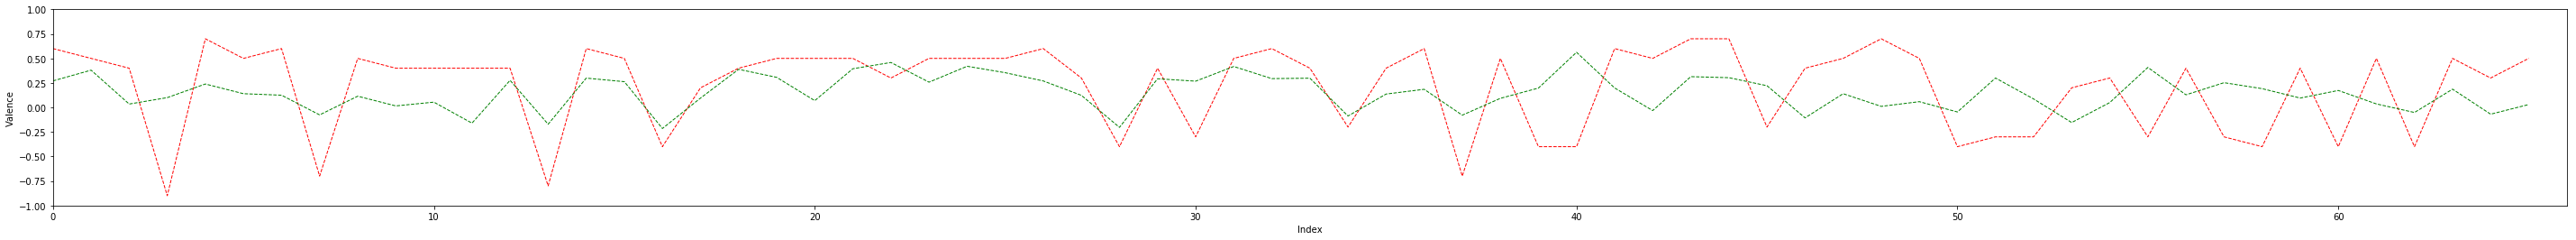

In [32]:
import matplotlib.pyplot as pl
pl.plot(valence_ts2.values, 'r--',valence_pred_ts2, 'g--', linewidth =1.0)
pl.ylim(ymin=-1,ymax=+1)
pl.xlim(xmin=0, xmax=66)
pl.ylabel("Valence")
pl.xlabel("Index")
fig_size = pl.rcParams["figure.figsize"]
fig_size[0] = 50
fig_size[1] = 4
pl.rcParams["figure.figsize"] = fig_size
pl.show()

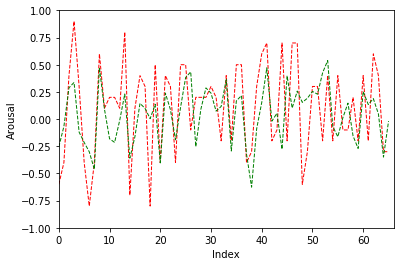

In [31]:
pl.plot(arousal_ts1.values, 'r--',arousal_pred_ts1, 'g--', linewidth =1.0)
pl.ylim(ymin=-1,ymax=+1)
pl.xlim(xmin=0, xmax=66)
pl.ylabel("Arousal")
pl.xlabel("Index")
fig_size = pl.rcParams["figure.figsize"]
fig_size[0] = 50
fig_size[1] = 4
pl.rcParams["figure.figsize"] = fig_size
pl.show()